In [342]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt


In [343]:
# ==== EASY VARIABLES ====
MAX_FOLDER = 2    # change this to 1, 2, 3, ... to include folders 1..MAX_FOLDER
SPLIT = "train"   # train / valid / test
IMG_SIZE = (80, 80)

# Path to dataset split
split_path = os.path.join("dataset", "Dataset454", SPLIT)
# D:\SE-Projects\E-learning platform\Backend\app\dataset\Dataset454\test\1

images = []
labels = []


In [344]:
def plot_loss_tf(history):
    plt.plot(history.history['loss'], label='Training loss')
    
    # If validation loss exists
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [352]:
for folder_num in range(0, MAX_FOLDER + 1):
    folder_path = os.path.join("D:\\SE-Projects\\E-learning platform\\Backend\\app\\dataset\\Dataset454\\train\\", str(folder_num))
    
    if not os.path.isdir(folder_path):
        print(f"[WARNING] Folder does not exist: {folder_path}")
        continue

    print(f"Loading images from folder: {folder_path}")
    
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(".jpg"):
            img_path = os.path.join(folder_path, file_name)
            
            # Load and preprocess
            img = load_img(img_path, color_mode='grayscale', target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize
            
            images.append(img_array)
            labels.append(folder_num) 

# NOW convert to numpy arrays after ALL appending is done
X_before = np.array(images)
Y = np.array(labels).reshape(-1, 1) # shape: (num_samples, 1)

# Flatten X for machine learning (num_samples, features)
X = X_before.reshape(X_before.shape[0], -1) 
print("Shape of X (flattened):", X_flattened.shape)
print("Shape of Y:", Y.shape)
print("first 5 elements :", Y[:5])

Loading images from folder: D:\SE-Projects\E-learning platform\Backend\app\dataset\Dataset454\train\0
Loading images from folder: D:\SE-Projects\E-learning platform\Backend\app\dataset\Dataset454\train\1
Loading images from folder: D:\SE-Projects\E-learning platform\Backend\app\dataset\Dataset454\train\2
Shape of X (flattened): (576, 6400)
Shape of Y: (1728, 1)
first 5 elements : [[0]
 [0]
 [0]
 [0]
 [0]]


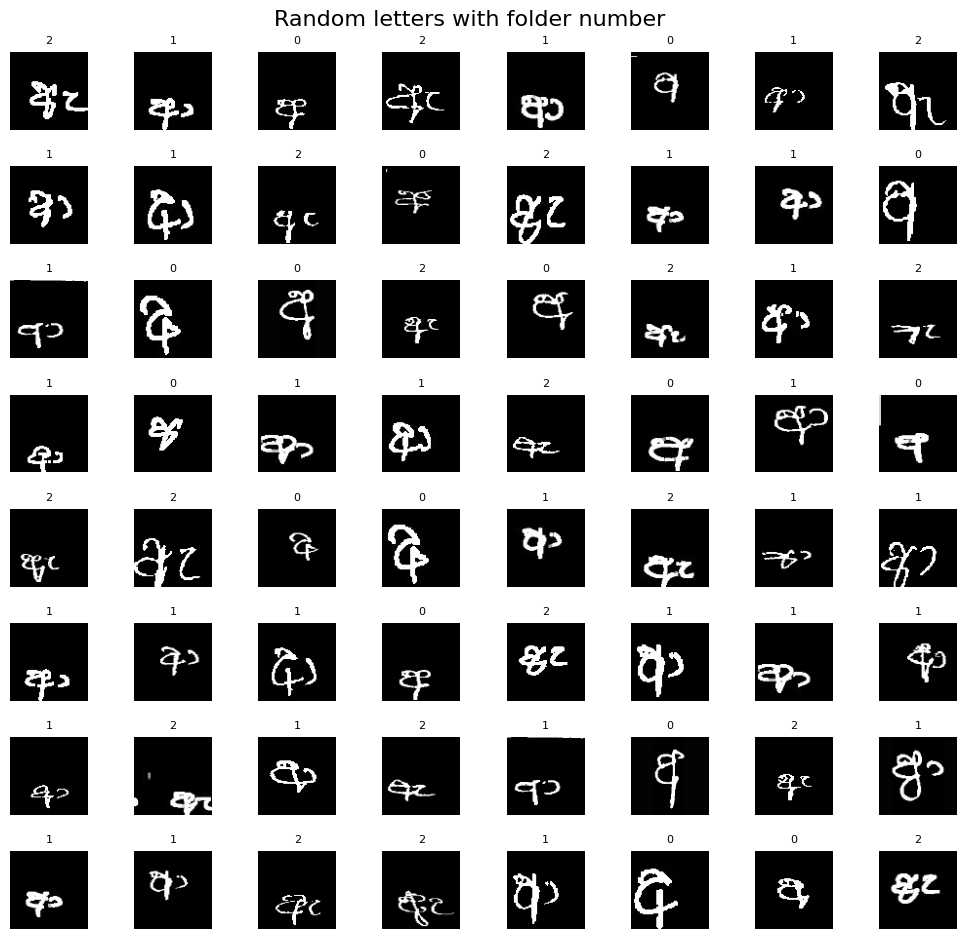

In [353]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples and features
m, n = X.shape

# Create 8x8 grid
fig, axes = plt.subplots(8, 8, figsize=(10,10))
fig.tight_layout(pad=0.5, rect=[0, 0.03, 1, 0.95])

for i, ax in enumerate(axes.flat):
    # Pick a random index
    random_index = np.random.randint(m)
    
    # Reshape flattened image back to 80x80
    img_reshaped = X[random_index].reshape((80, 80))
    
    # Show the image
    ax.imshow(img_reshaped, cmap='gray')
    
    # Show the label (folder number) on top
    ax.set_title(Y[random_index, 0], fontsize=8)
    
    # Remove axes for cleaner look
    ax.set_axis_off()

fig.suptitle("Random letters with folder number", fontsize=16)
plt.show()


In [354]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(6400,)), 
        Dense(25, activation="relu", name="L1" ),
        Dense(10, activation="relu", name="L2" ),
        Dense(3, activation="linear", name="L3" )
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │       160,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,318 (626.24 KB)

 Trainable params: 160,318 (626.24 KB)

 Non-trainable params: 0 (0.00 B)

In [355]:
[layer1, layer2, layer3] = model.layers

In [356]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (6400, 25), b1 shape = (25,)
W2 shape = (25, 10), b2 shape = (10,)
W3 shape = (10, 3), b3 shape = (3,)


In [357]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,Y,
    epochs=100
)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6756
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3543
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1381
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049  
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.004

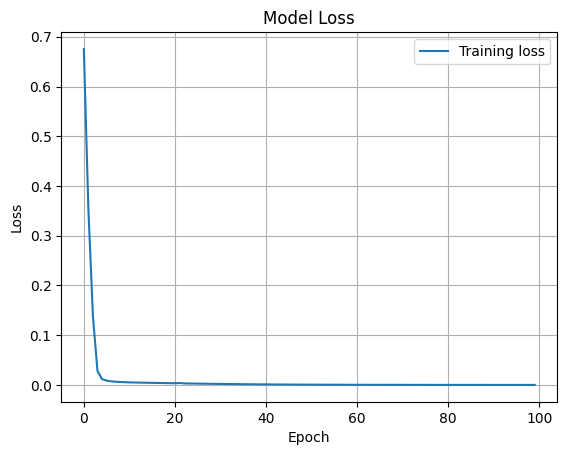

In [358]:
plot_loss_tf(history)

In [359]:
IMG_SIZE = (80, 80)

def load_test_data(test_path, max_folder=1):
    images = []
    labels = []

    for folder_num in range(1, max_folder + 1):
        folder_path = os.path.join(test_path, str(folder_num))
        if not os.path.isdir(folder_path):
            continue

        for file in os.listdir(folder_path):
            if file.lower().endswith(".jpg"):
                img = load_img(
                    os.path.join(folder_path, file),
                    color_mode="grayscale",
                    target_size=IMG_SIZE
                )
                img_array = img_to_array(img) / 255.0
                images.append(img_array.reshape(-1))  # flatten
                labels.append(folder_num)

    return np.array(images), np.array(labels).reshape(-1, 1)

X_test, Y_test = load_test_data(
    "D:/SE-Projects/E-learning platform/Backend/app/dataset/Dataset454/test",
    MAX_FOLDER
)

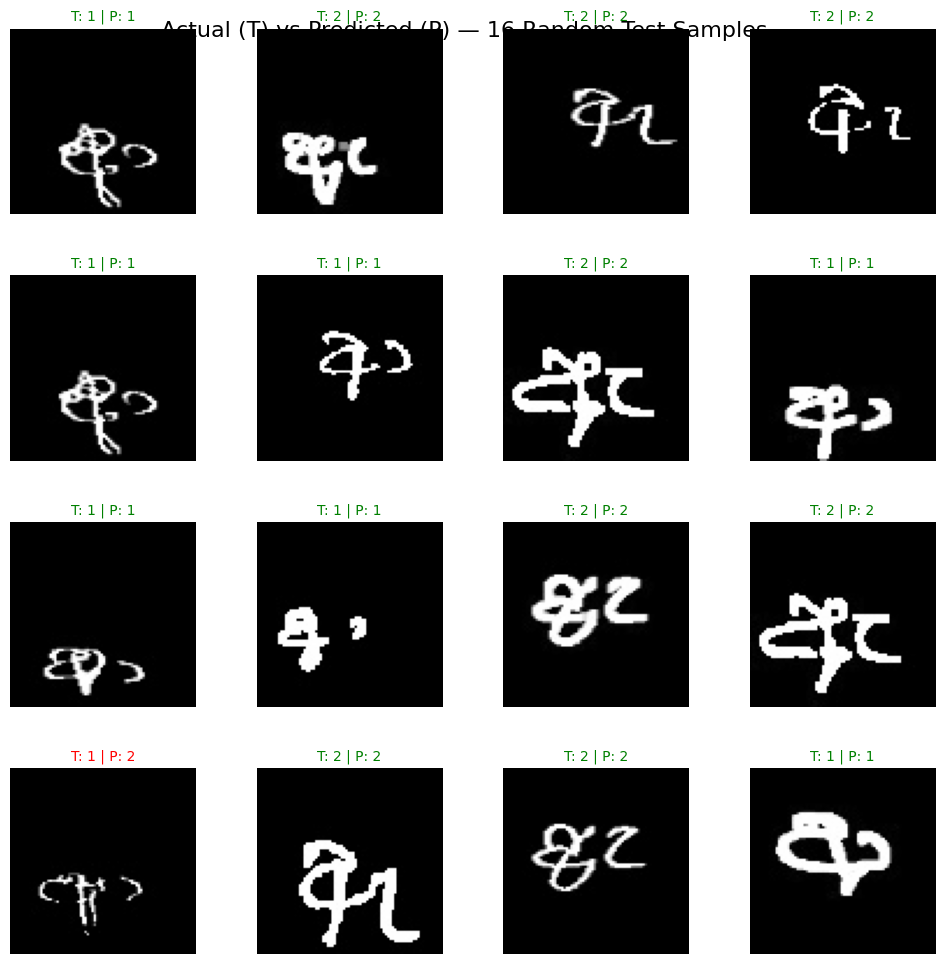

In [360]:
import numpy as np
import matplotlib.pyplot as plt

NUM_SAMPLES = 16
ROWS = 4
COLS = 4

fig, axes = plt.subplots(ROWS, COLS, figsize=(10, 10))
fig.tight_layout(pad=1.0)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    
    # True label
    true_label = Y_test[idx][0]
    
    # Prediction
    pred_probs = model.predict(X_test[idx].reshape(1, 6400), verbose=0)
    pred_label = np.argmax(pred_probs)
    
    # Show image
    ax.imshow(X_test[idx].reshape(80, 80), cmap='gray')
    
    # Title with comparison
    color = "green" if true_label == pred_label else "red"
    ax.set_title(f"T: {true_label} | P: {pred_label}", color=color, fontsize=10)
    
    ax.axis("off")

fig.suptitle("Actual (T) vs Predicted (P) — 16 Random Test Samples", fontsize=16)
plt.show()


In [361]:
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)

accuracy = np.mean(pred_labels.reshape(-1,1) == Y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test Accuracy: 89.58%


In [363]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np

CANVAS_SIZE = 280
IMG_SIZE = 80

root = tk.Tk()
root.title("Draw Letter (Black BG, White Letter)")

canvas = tk.Canvas(root, width=CANVAS_SIZE, height=CANVAS_SIZE, bg="black")
canvas.pack()

# PIL image (black background)
image = Image.new("L", (CANVAS_SIZE, CANVAS_SIZE), "black")
draw = ImageDraw.Draw(image)

def paint(event):
    x, y = event.x, event.y
    r = 5
    canvas.create_oval(x-r, y-r, x+r, y+r, fill="white", outline="white")
    draw.ellipse((x-r, y-r, x+r, y+r), fill="white")

canvas.bind("<B1-Motion>", paint)

# 🔁 Clear / Refresh function
def clear_canvas():
    canvas.delete("all")
    canvas.configure(bg="black")

    global image, draw
    image = Image.new("L", (CANVAS_SIZE, CANVAS_SIZE), "black")
    draw = ImageDraw.Draw(image)

# 🔘 Buttons
btn_predict = tk.Button(root, text="Predict", command=lambda: predict())
btn_predict.pack(side="left", padx=10, pady=10)

btn_clear = tk.Button(root, text="Clear", command=clear_canvas)
btn_clear.pack(side="right", padx=10, pady=10)

def predict():
    img = image.resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img) / 255.0
    img = img.reshape(1, 6400)



    pred = model.predict(img, verbose=0)
    
    print("Prediction probabilities:", pred)
    predicted_class = np.argmax(pred)

    print("Predicted folder:", predicted_class)
    
btn = tk.Button(root, text="Predict", command=predict)
btn.pack()

root.mainloop()



Prediction probabilities: [[ 9.158509 -9.181574 -5.665556]]
Predicted folder: 0
Prediction probabilities: [[ 3.3708842  2.6741812 -8.034038 ]]
Predicted folder: 0
Prediction probabilities: [[ -1.7009649  26.249643  -16.917475 ]]
Predicted folder: 1
Prediction probabilities: [[ -1.7009649  26.249643  -16.917475 ]]
Predicted folder: 1
Prediction probabilities: [[-1.6851077  1.1456863 -0.6216142]]
Predicted folder: 1
Prediction probabilities: [[-1.6851077  1.1456863 -0.6216142]]
Predicted folder: 1
Prediction probabilities: [[-3.005271   8.6852865 -6.068719 ]]
Predicted folder: 1


KeyboardInterrupt: 

In [ ]:
def rename_folders(path):
    # Loop from 1 to 454 (range is exclusive of the stop number, so 455)
    for i in range(1, 455):
        old_name = os.path.join(path, str(i))
        new_name = os.path.join(path, str(i - 1))

        # Check if the folder exists before trying to rename it
        if os.path.exists(old_name):
            try:
                os.rename(old_name, new_name)
                print(f"Successfully renamed: {i} -> {i-1}")
            except OSError as e:
                print(f"Error renaming {i}: {e}")
        else:
            print(f"Skipping: Folder '{i}' not found.")

# rename_folders("D:/SE-Projects/E-learning platform/Backend/app/dataset/Dataset454/valid")

Skipping: Folder '1' not found.
Successfully renamed: 2 -> 1
Successfully renamed: 3 -> 2
Successfully renamed: 4 -> 3
Successfully renamed: 5 -> 4
Successfully renamed: 6 -> 5
Successfully renamed: 7 -> 6
Successfully renamed: 8 -> 7
Successfully renamed: 9 -> 8
Successfully renamed: 10 -> 9
Successfully renamed: 11 -> 10
Successfully renamed: 12 -> 11
Successfully renamed: 13 -> 12
Successfully renamed: 14 -> 13
Successfully renamed: 15 -> 14
Successfully renamed: 16 -> 15
Successfully renamed: 17 -> 16
Successfully renamed: 18 -> 17
Successfully renamed: 19 -> 18
Successfully renamed: 20 -> 19
Successfully renamed: 21 -> 20
Successfully renamed: 22 -> 21
Successfully renamed: 23 -> 22
Successfully renamed: 24 -> 23
Successfully renamed: 25 -> 24
Successfully renamed: 26 -> 25
Successfully renamed: 27 -> 26
Successfully renamed: 28 -> 27
Successfully renamed: 29 -> 28
Successfully renamed: 30 -> 29
Successfully renamed: 31 -> 30
Successfully renamed: 32 -> 31
Successfully renamed: 33